In [64]:
# Import the random module.
import random
import numpy as np
from citipy import citipy
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
import requests
from datetime import datetime
import pandas as pd

In [65]:
random_number = random.randint(-90, 89) + random.random()
random_number

-11.889954959714158

In [66]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1

In [67]:
# Import timeit.
import timeit

# Import the NumPy module.
import numpy as np

In [68]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

12.4 µs ± 607 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [69]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.78 ms ± 62.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [70]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [71]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [72]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [73]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

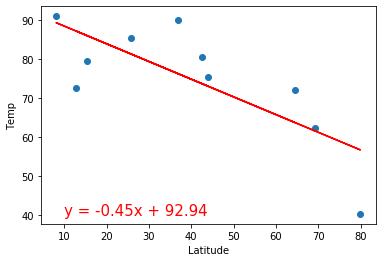

In [74]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [75]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [76]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mao
Processing Record 2 of Set 1 | cururupu
Processing Record 3 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 1 | katsuura
Processing Record 5 of Set 1 | aguas vermelhas
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | monte patria
Processing Record 8 of Set 1 | aksu
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | katha
City not found. Skipping...
Processing Record 11 of Set 1 | porbandar
Processing Record 12 of Set 1 | komsomolskiy
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | hualmay
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | 

Processing Record 36 of Set 4 | arlit
Processing Record 37 of Set 4 | chuy
Processing Record 38 of Set 4 | nyuksenitsa
Processing Record 39 of Set 4 | naters
Processing Record 40 of Set 4 | nishihara
Processing Record 41 of Set 4 | achisay
City not found. Skipping...
Processing Record 42 of Set 4 | santana
Processing Record 43 of Set 4 | nome
Processing Record 44 of Set 4 | vuktyl
Processing Record 45 of Set 4 | sorong
Processing Record 46 of Set 4 | tamara
Processing Record 47 of Set 4 | ilembo
Processing Record 48 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 4 | acarau
Processing Record 50 of Set 4 | carutapera
Processing Record 1 of Set 5 | nuevo progreso
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | banapur
Processing Record 4 of Set 5 | khash
Processing Record 5 of Set 5 | maarianhamina
Processing Record 6 of Set 5 | bengkulu
Processing Record 7 of Set 5 | carnarvon
Processing Record 8 of Set 5 | glendive
Processing Record

Processing Record 30 of Set 8 | tidore
City not found. Skipping...
Processing Record 31 of Set 8 | shakawe
Processing Record 32 of Set 8 | egvekinot
Processing Record 33 of Set 8 | kavieng
Processing Record 34 of Set 8 | lewisporte
Processing Record 35 of Set 8 | velingara
Processing Record 36 of Set 8 | skovorodino
Processing Record 37 of Set 8 | carupano
Processing Record 38 of Set 8 | batagay-alyta
Processing Record 39 of Set 8 | makakilo city
Processing Record 40 of Set 8 | metro
Processing Record 41 of Set 8 | half moon bay
Processing Record 42 of Set 8 | pacific grove
Processing Record 43 of Set 8 | beloha
Processing Record 44 of Set 8 | timizart
Processing Record 45 of Set 8 | sangar
Processing Record 46 of Set 8 | arman
Processing Record 47 of Set 8 | norman wells
Processing Record 48 of Set 8 | port blair
Processing Record 49 of Set 8 | lasa
Processing Record 50 of Set 8 | kutum
Processing Record 1 of Set 9 | port macquarie
Processing Record 2 of Set 9 | pulawy
Processing Reco

Processing Record 17 of Set 12 | hoganas
Processing Record 18 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 19 of Set 12 | concepcion
Processing Record 20 of Set 12 | at-bashi
Processing Record 21 of Set 12 | bahia blanca
Processing Record 22 of Set 12 | shahr-e kord
Processing Record 23 of Set 12 | quthing
Processing Record 24 of Set 12 | copiapo
Processing Record 25 of Set 12 | gornyye klyuchi
Processing Record 26 of Set 12 | valleyview
Processing Record 27 of Set 12 | pierreville
Processing Record 28 of Set 12 | kihei
Processing Record 29 of Set 12 | sur
Processing Record 30 of Set 12 | elizabeth city
Processing Record 31 of Set 12 | fulitun
City not found. Skipping...
Processing Record 32 of Set 12 | springdale
Processing Record 33 of Set 12 | vagur
Processing Record 34 of Set 12 | poltavka
Processing Record 35 of Set 12 | praia
Processing Record 36 of Set 12 | kabinda
Processing Record 37 of Set 12 | hay river
Processing Record 38 of Set 12 | margate
Processin

In [77]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

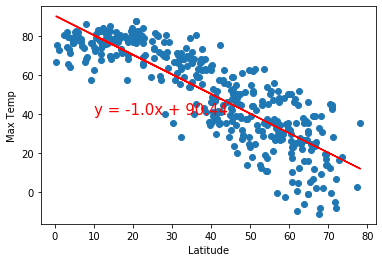

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,40))

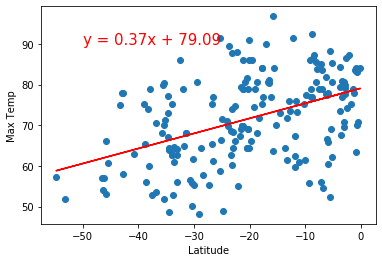

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-50,90))

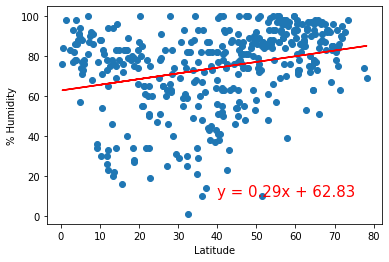

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,10))

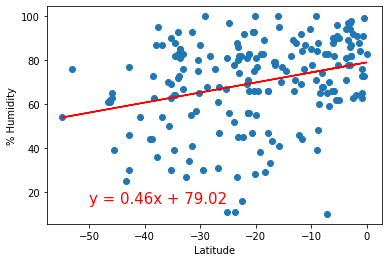

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemispherefor % Humidity', 
                       '% Humidity',(-50,15))

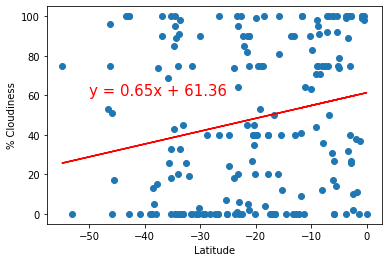

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemispherefor % Cloudiness', 
                       '% Cloudiness',(-50,60))

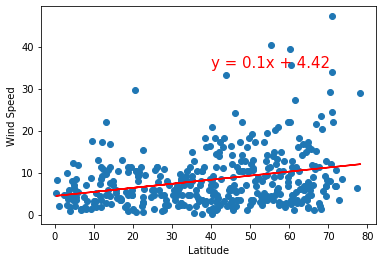

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,35))

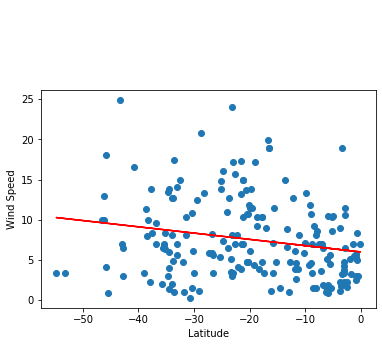

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,35))